In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df=pd.read_csv(r"C:\Users\admin\Downloads\Airbnb NYC 2019.csv")

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Problems

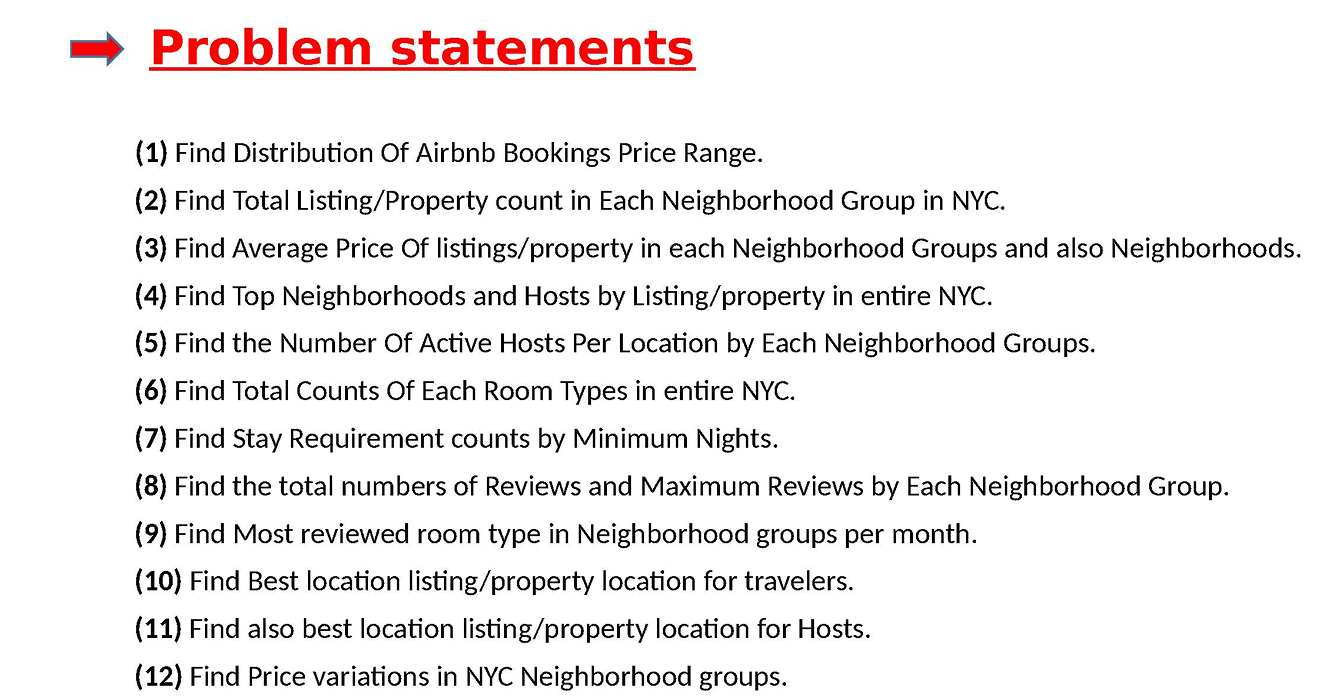

In [51]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [11]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Q1

<Axes: xlabel='price', ylabel='Count'>

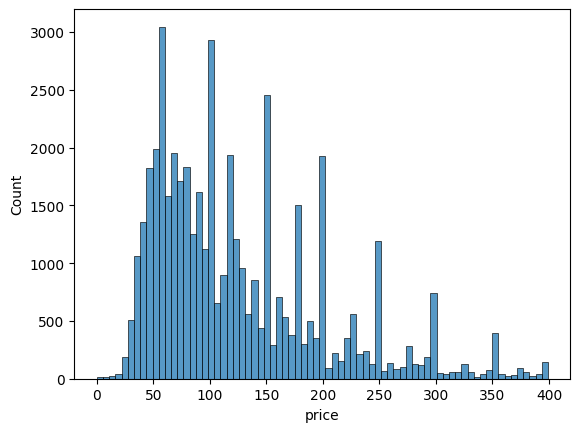

In [16]:
sns.histplot(df.query('price<400')['price'])

In [27]:
df['price'].quantile(0.93)

300.0

#### Q2

In [49]:
q2=df.groupby(['neighbourhood_group']).agg(no_of_listings=('id','nunique'),no_of_property=('name','nunique')).reset_index()

In [72]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

<Axes: xlabel='neighbourhood_group', ylabel='no_of_listings'>

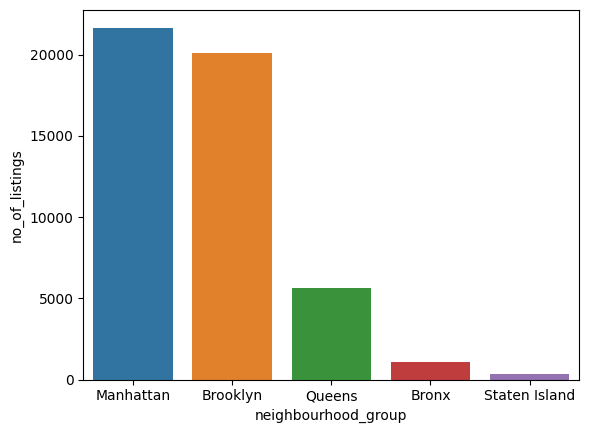

In [53]:
sns.barplot(q2.sort_values(by='no_of_listings',ascending=False),x='neighbourhood_group',y='no_of_listings',hue='neighbourhood_group')

1. Manhattan and brooklyn has highest no of listings
2. Staten Island has minimum no of listings


#### Q3

In [5]:
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr


In [ ]:
plt.figure(figsize=(8,16))
sns.boxplot(df['price'])

In [6]:
df_new=df[(df['price']>=lower_bound)& (df['price']<=upper_bound)]

In [57]:
df.groupby('neighbourhood_group')['price'].mean().reset_index()

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


In [69]:
df_new['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        19506
Brooklyn         19415
Queens            5567
Bronx             1070
Staten Island      365
Name: count, dtype: int64

In [75]:
df_new['price'].describe()

count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64

In [68]:
df_new.groupby('neighbourhood_group')['price'].mean().reset_index()

,neighbourhood_group,price
0,Bronx,77.365421
1,Brooklyn,105.699614
2,Manhattan,145.952835
3,Queens,88.904437
4,Staten Island,89.235616


<Axes: xlabel='neighbourhood_group', ylabel='price'>

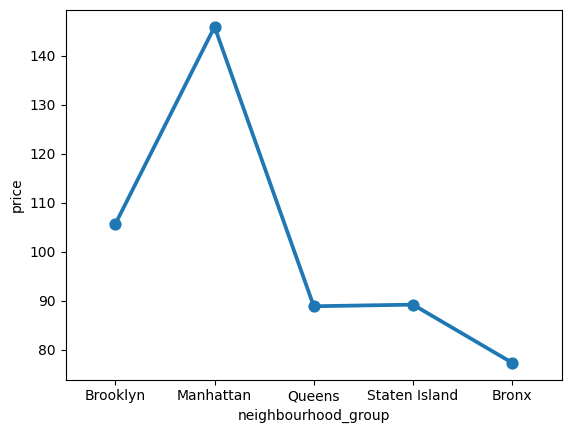

In [83]:
sns.pointplot(x='neighbourhood_group',y='price',data=df_new,errorbar=None)

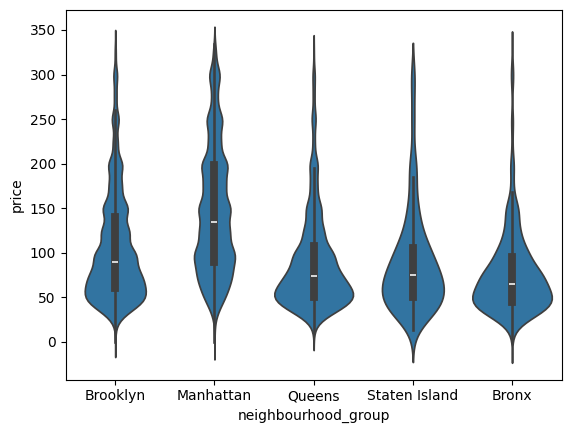

In [14]:
ax=sns.violinplot(x='neighbourhood_group',y='price',data=df_new)

#### Q4

<Axes: xlabel='neighbourhood'>

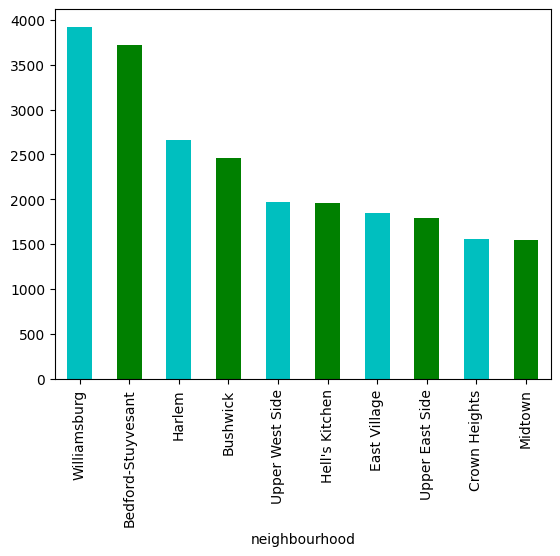

In [13]:
df['neighbourhood'].value_counts().head(10).plot(kind='bar',color=['c','g'])

In [81]:
df['host_id'].value_counts().head(10)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

#### Q5

<Axes: xlabel='neighbourhood_group'>

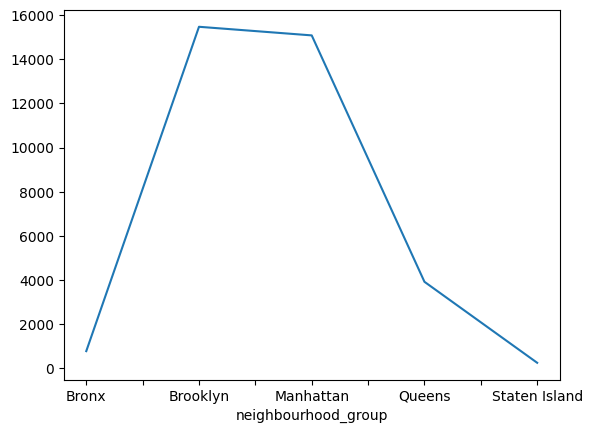

In [17]:
df_new.groupby('neighbourhood_group')['host_id'].nunique().plot(kind='line')

#### Q6

<Axes: ylabel='count'>

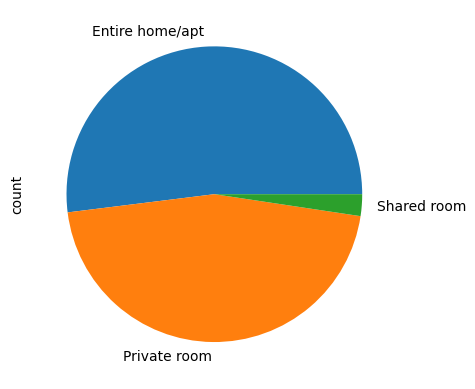

In [21]:
df['room_type'].value_counts().plot(kind='pie')

#### Q7

<Axes: xlabel='minimum_nights'>

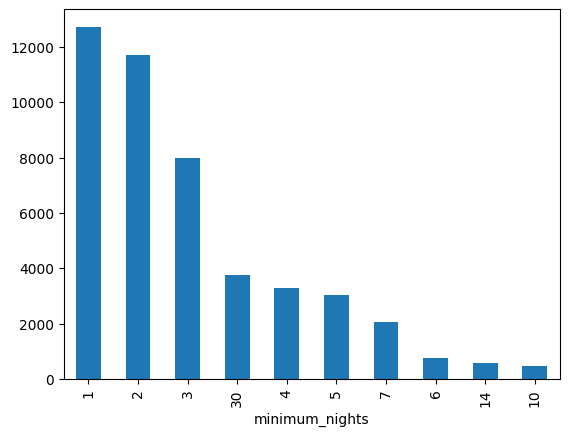

In [32]:
df['minimum_nights'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

In [28]:
def remove_outliers(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    return df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]

#### Q8

In [34]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [37]:
df.groupby('neighbourhood_group').agg(total_reviews=('number_of_reviews','sum'),max_reviews=('number_of_reviews','max')).reset_index()

,neighbourhood_group,total_reviews,max_reviews
0,Bronx,28371,321
1,Brooklyn,486574,488
2,Manhattan,454569,607
3,Queens,156950,629
4,Staten Island,11541,333


#### Q9

In [51]:
df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum().reset_index()

,neighbourhood_group,room_type,number_of_reviews
0,Bronx,Entire home/apt,11627
1,Bronx,Private room,16312
2,Bronx,Shared room,432
3,Brooklyn,Entire home/apt,267128
4,Brooklyn,Private room,213653
5,Brooklyn,Shared room,5793
6,Manhattan,Entire home/apt,235147
7,Manhattan,Private room,209150
8,Manhattan,Shared room,10272
9,Queens,Entire home/apt,60644


In [ ]:
read("shhet_url","sheet_name")
write("sheet_url","sheet_name",df)

#### Q10


In [55]:
df[df['number_of_reviews']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<Axes: >

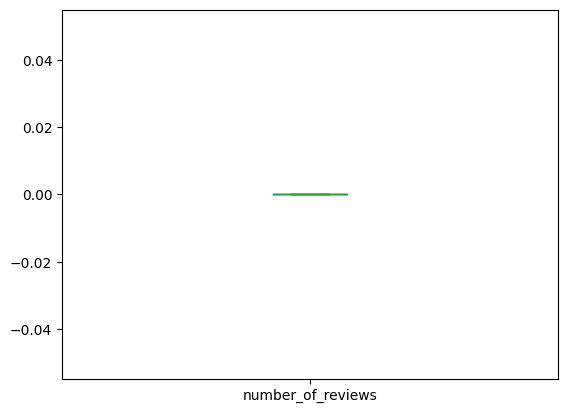

In [62]:
df[df['neighbourhood']=="New Dorp"]['number_of_reviews'].plot(kind='box')

In [63]:
df.groupby('neighbourhood')['number_of_reviews'].median().sort_values(ascending=False).head(10)

neighbourhood
Silver Lake        118.5
Eltingville         83.0
Richmondtown        79.0
Manhattan Beach     50.0
East Morrisania     40.5
Lighthouse Hill     39.0
Pelham Gardens      38.5
Dyker Heights       37.0
Graniteville        36.0
Highbridge          32.0
Name: number_of_reviews, dtype: float64

In [65]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [66]:
df_new=df_new[[
       'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

<Axes: >

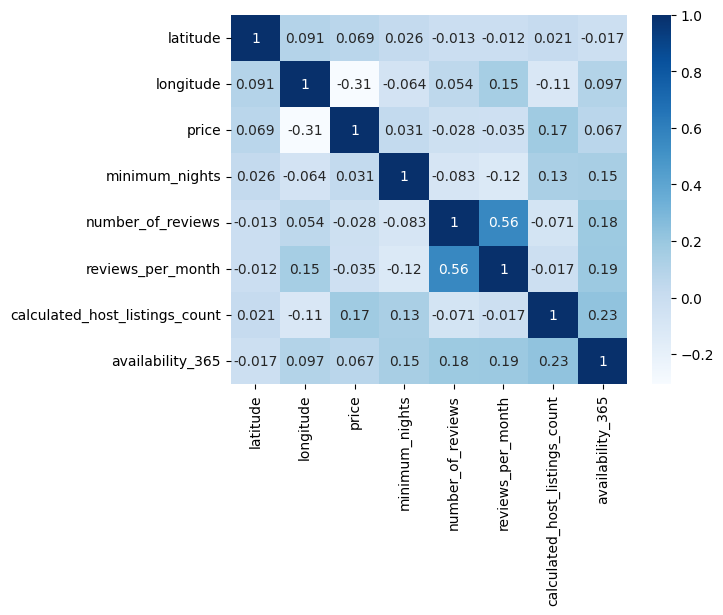

In [67]:
sns.heatmap(df_new.corr(),cmap='Blues',annot=True)

In [75]:
iris=sns.load_dataset('iris')

<Axes: >

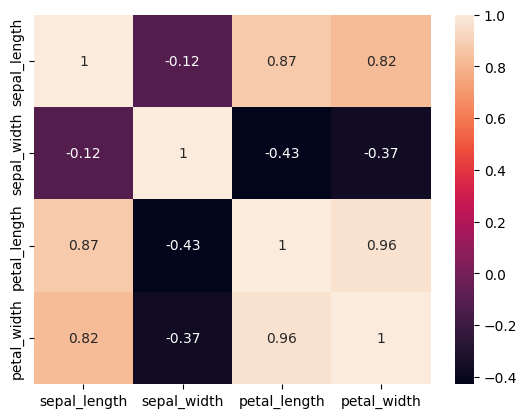

In [80]:
sns.heatmap(iris.drop(columns='species').corr(),annot=True)

<Axes: xlabel='petal_length', ylabel='petal_width'>

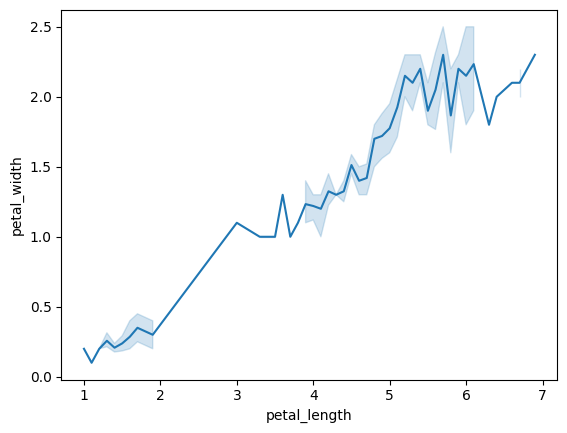

In [81]:
sns.lineplot(iris,x='petal_length',y='petal_width')

<Axes: xlabel='price', ylabel='longitude'>

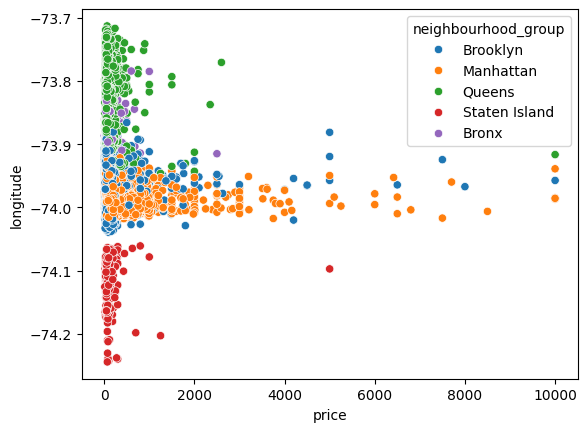

In [73]:
sns.scatterplot(df,x='price',y='longitude',hue='neighbourhood_group')